In [ ]:
%pip install -r requirements.txt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import openai 
openai.api_key = " "

In [6]:
from utils import load_graphene_data
from utils import post_process_predictions
from utils import setup_plot_style
from utils import normalize_value
from featurization import preprocess_data
import json
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

**Exploratory Data Analysis**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CVD Method                     164 non-null    object 
 1   Pressure (mbar)                117 non-null    float64
 2   Gases {Gas: Flow rate (sccm)}  156 non-null    object 
 3   Temperature (°C)               162 non-null    float64
 4   Growth Time (min)              97 non-null     float64
 5   Substrate                      164 non-null    object 
 6   No. of Graphene Layers         160 non-null    object 
dtypes: float64(3), object(4)
memory usage: 9.1+ KB
None
  CVD Method  Pressure (mbar) Gases {Gas: Flow rate (sccm)}  Temperature (°C)  \
0   Hot-Wall           800.00      {'Ar': None, 'H2': None}        766.666667   
1   Hot-Wall           750.00     {'CH4': None, 'Ar': None}       1050.000000   
2   Hot-Wall          1013.25                {'n-C6H14':

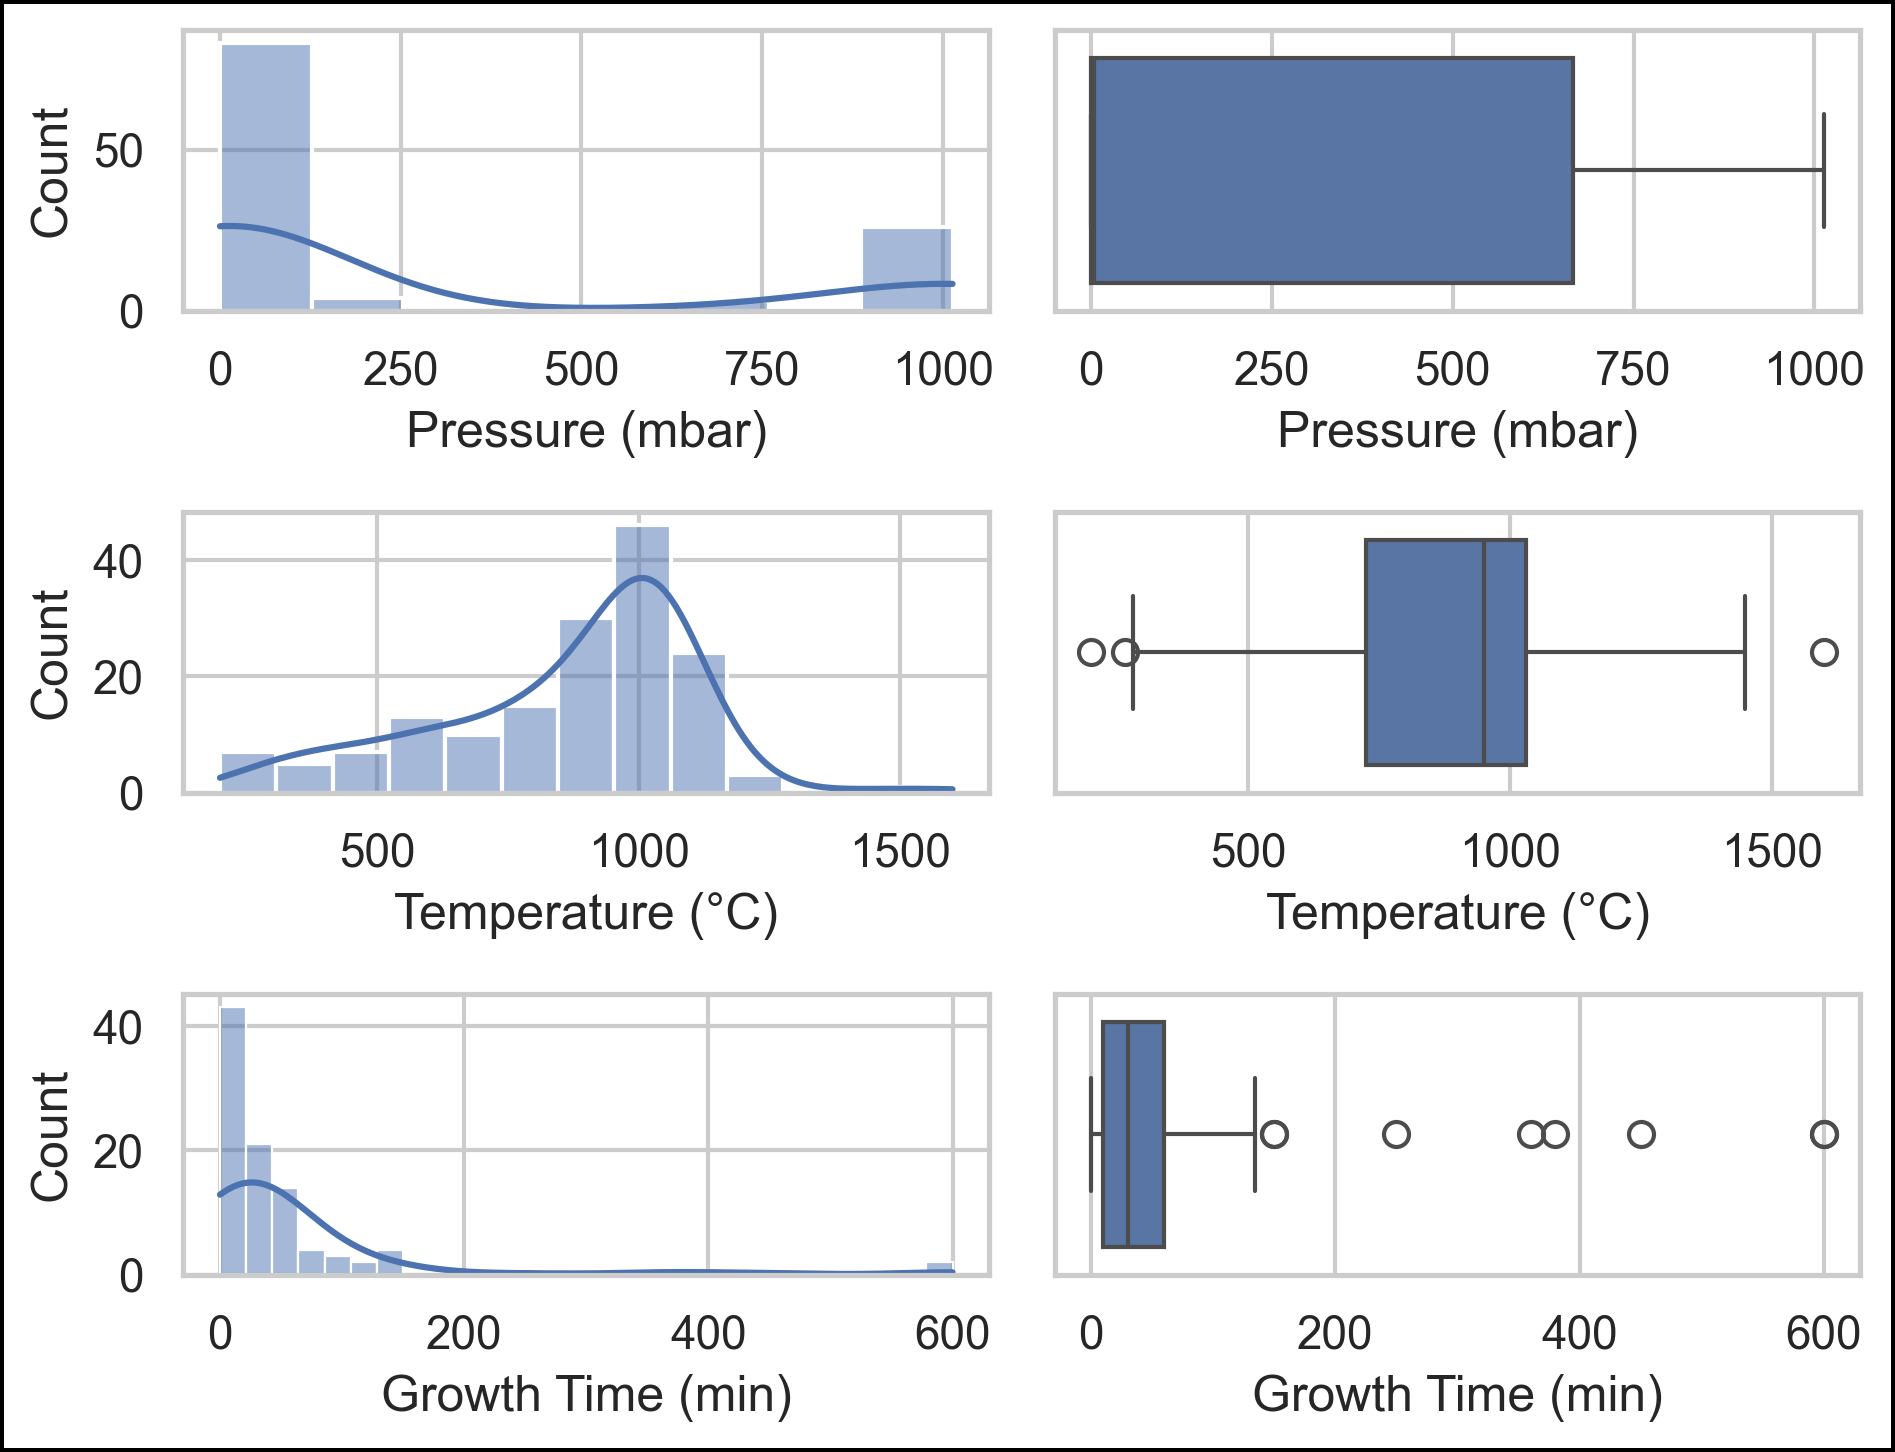

In [3]:
# Apply global plot style
setup_plot_style()

# Load the dataset from the Data folder
data = load_graphene_data()

# Inspect the data
print(data.info())
print(data.head())
print(data.describe())

# Set Seaborn style
sns.set(style="whitegrid")

# Create a 3x2 subplot grid (histograms with KDE on the left, box plots on the right)
fig, axes = plt.subplots(3, 2, figsize=(6.5, 5))

# Histograms with KDE
sns.histplot(data=data, x='Pressure (mbar)', kde=True, ax=axes[0, 0])
sns.histplot(data=data, x='Temperature (°C)', kde=True, ax=axes[1, 0])
sns.histplot(data=data, x='Growth Time (min)', kde=True, ax=axes[2, 0])

# Box plots
sns.boxplot(x=data['Pressure (mbar)'], ax=axes[0, 1])
sns.boxplot(x=data['Temperature (°C)'], ax=axes[1, 1])
sns.boxplot(x=data['Growth Time (min)'], ax=axes[2, 1])

# Set a white face color and a black border around the entire figure
fig.patch.set_facecolor('white')
fig.patch.set_edgecolor('black')
fig.patch.set_linewidth(1.5)

# Optionally, to add borders around each subplot, uncomment the following:
# for row in axes:
#     for ax in row:
#         for spine in ax.spines.values():
#             spine.set_edgecolor('black')
#             spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()


**Temperature Analysis**

In [ ]:
import numpy as np # type: ignore
from utils import aggregate_imputation
from utils import plot_avg_deviations
data = preprocess_data(load_graphene_data())
valid_indices = data.index[data["CH4"].notnull()].tolist()
temperatures = np.arange(0.2, 1.1, 0.2)
max_iterations = 6

# Compute average final deviation for each temperature using aggregate_imputation
avg_deviations_dict = {
    temp: aggregate_imputation(data, valid_indices, temp, max_iterations=max_iterations)[1]
    for temp in temperatures
}

# Rank temperatures by lowest average deviation
temp_deviation_pairs = sorted(avg_deviations_dict.items(), key=lambda x: x[1])
print("\nRanked by lowest average deviation:")
for temp, avg_dev in temp_deviation_pairs:
    print(f"Temp: {temp:.1f}, Average Deviation: {avg_dev:.2f}")

plot_avg_deviations(avg_deviations_dict)

**Imputation Analysis Plots**


Post-processing for Pressure (mbar)...
Row 0: Avg Imputation=800.0, Min Imputation=800.0, GT=800.0
Row 1: Avg Imputation=1000.0, Min Imputation=1000.0, GT=750.0
Row 2: Avg Imputation=612.5, Min Imputation=1200.0, GT=1013.25
Row 3: Avg Imputation=316.6666666666667, Min Imputation=150.0, GT=26.67
Row 4: Avg Imputation=451.6666666666667, Min Imputation=150.0, GT=13.33
Row 5: Avg Imputation=950.0, Min Imputation=200.0, GT=133.3
Row 6: Avg Imputation=530.0, Min Imputation=150.0, GT=53.32
Row 7: Avg Imputation=800.0, Min Imputation=1000.0, GT=1013.25
Row 8: Avg Imputation=439.0833333333333, Min Imputation=34.5, GT=13.33
Row 9: Avg Imputation=325.0, Min Imputation=600.0, GT=1013.25
Row 10: Avg Imputation=608.3333333333334, Min Imputation=1200.0, GT=1013.25
Row 11: Avg Imputation=466.6666666666667, Min Imputation=800.0, GT=1013.25
Row 12: Avg Imputation=616.6666666666666, Min Imputation=1200.0, GT=1013.25
Row 13: Avg Imputation=638.3333333333334, Min Imputation=1200.0, GT=1013.25
Row 14: Avg 

/Users/devcmrl/Desktop/Fall 2024/GScarceLLM/utils.py:175: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/devcmrl/Desktop/Fall 2024/GScarceLLM/utils.py:175: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/devcmrl/Desktop/Fall 2024/GScarceLLM/utils.py:175: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/devcmrl/Desktop/Fall 2024/GScarceLLM/utils.py:175: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behav

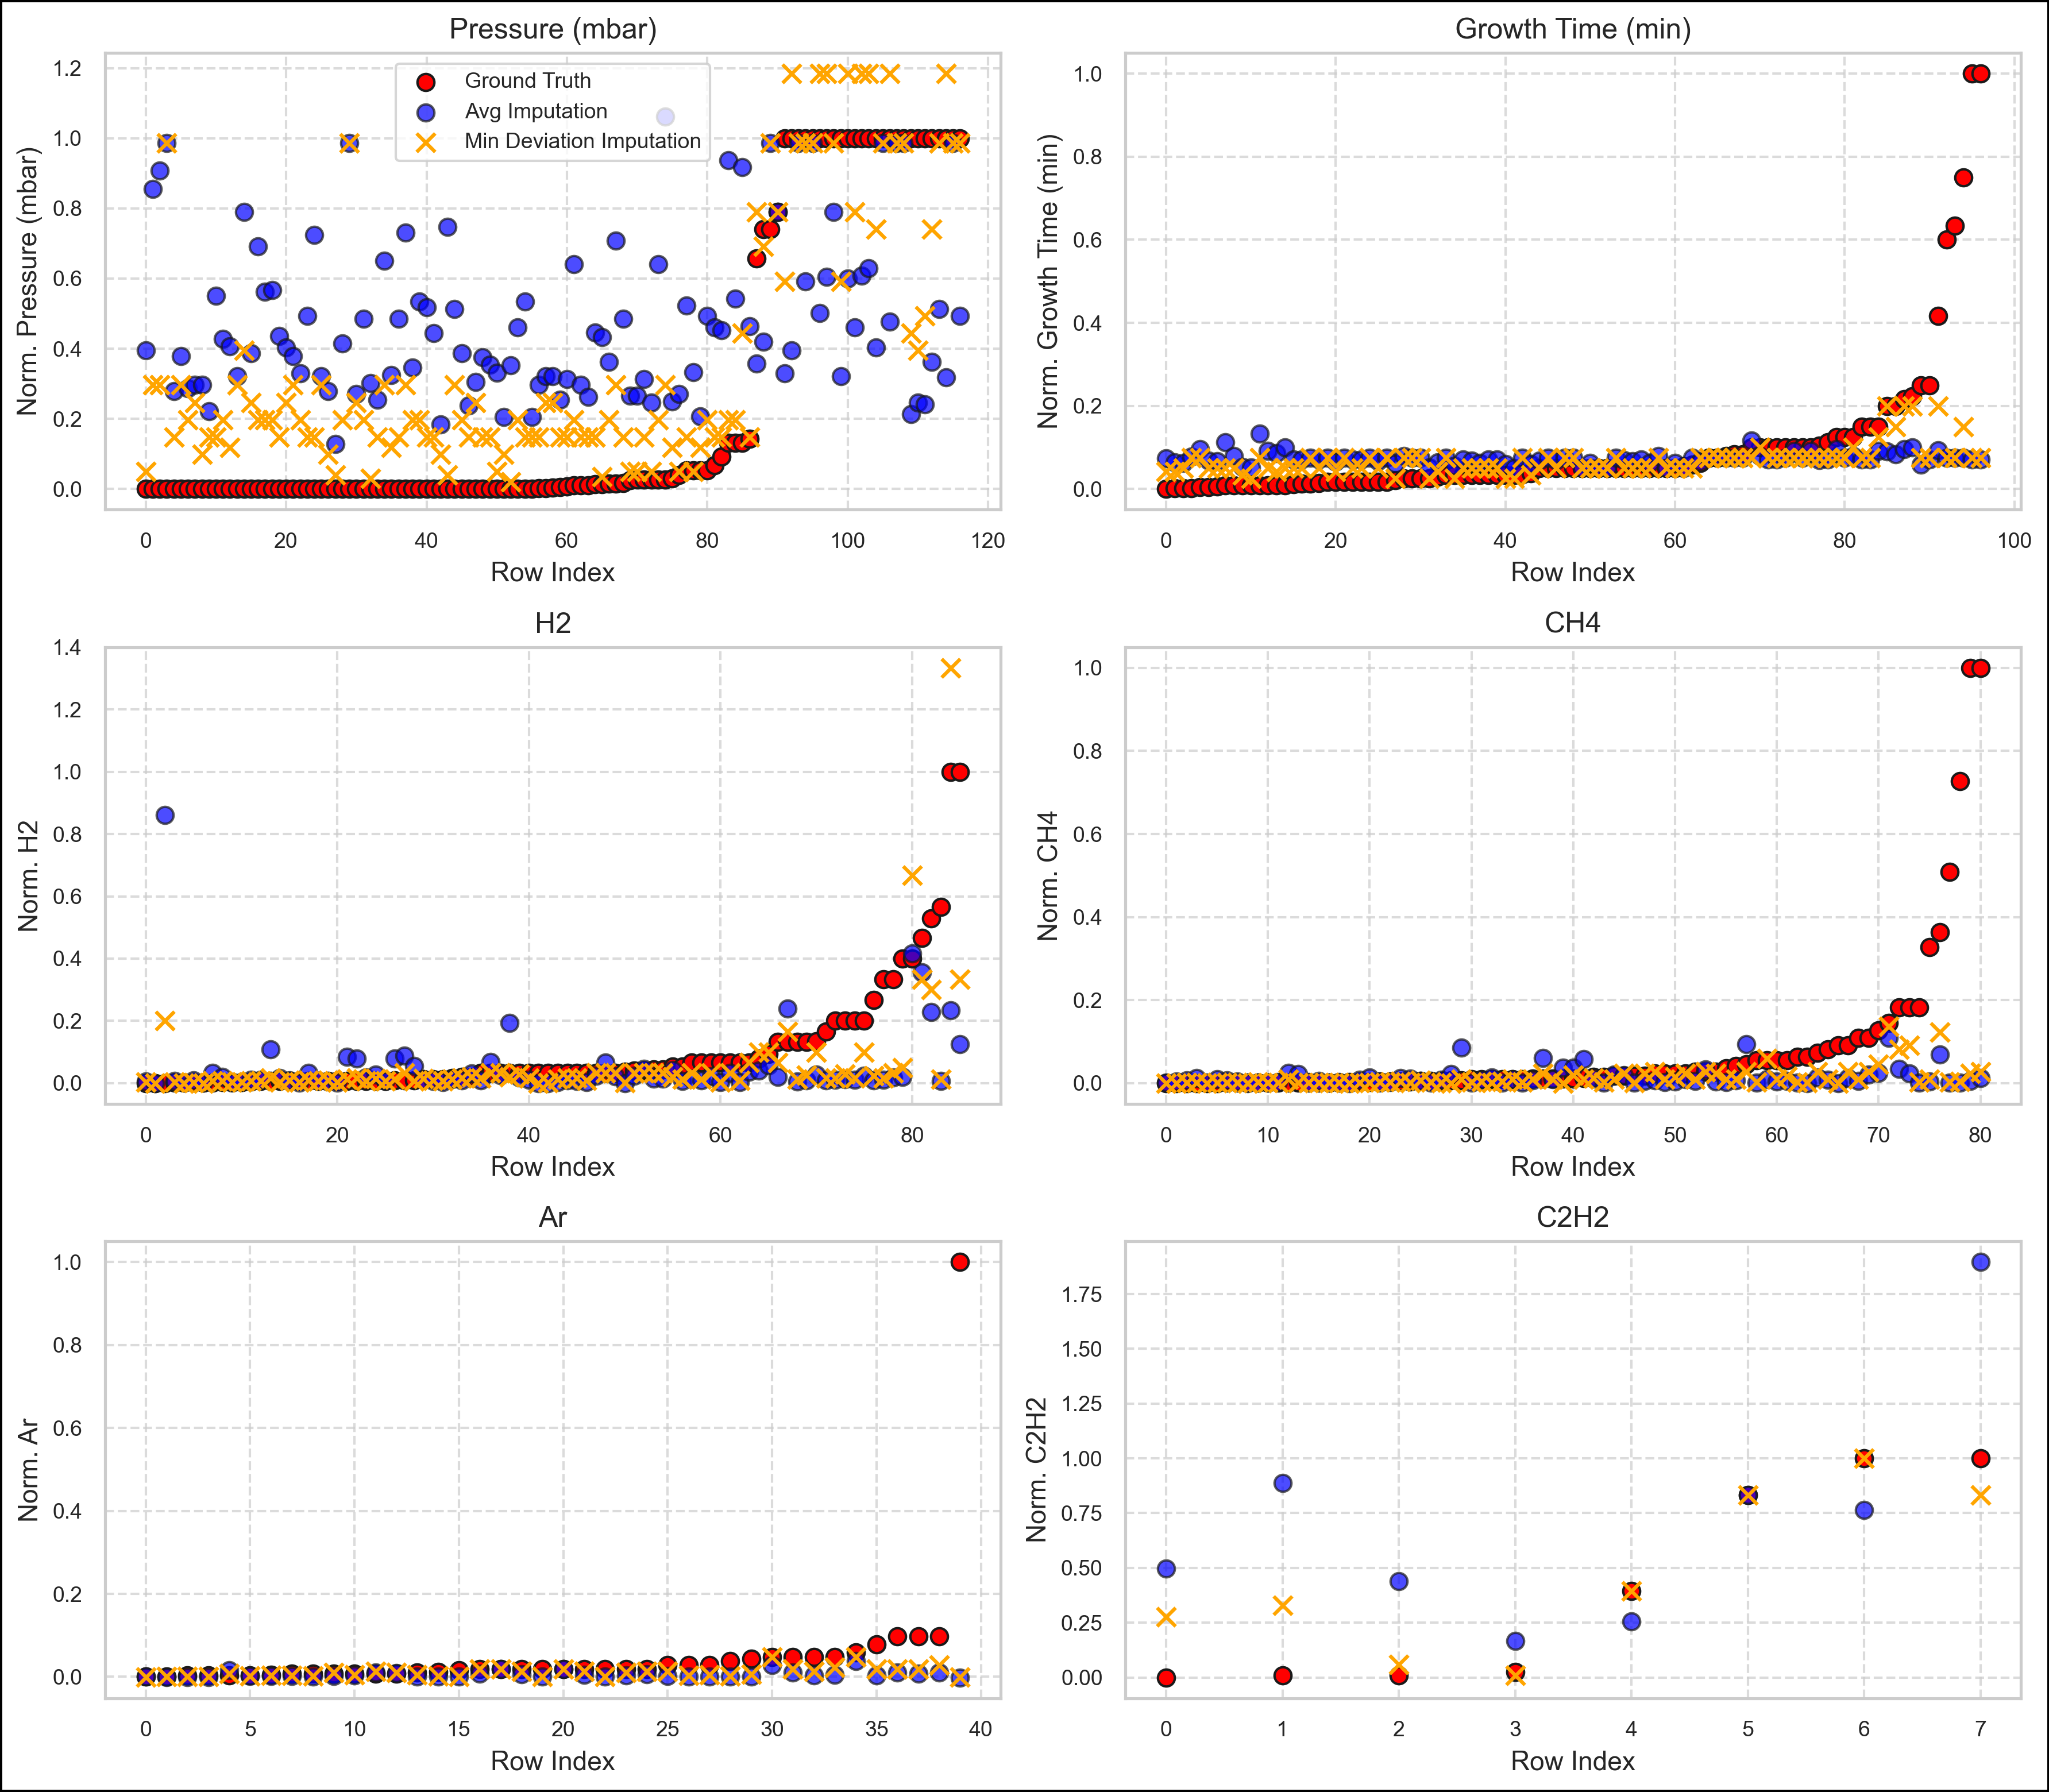

In [4]:
setup_plot_style()
preprocessed_data= preprocess_data(load_graphene_data())

with open('Data/predictions_dict.json', 'r') as file:
    predictions_dict = json.load(file)

# Define the attributes you want to impute
attributes_to_impute = ['Pressure (mbar)', 'Growth Time (min)', 'H2', 'CH4', 'Ar', 'C2H2']

# Call the post-processing function with the sorting switch
post_process_predictions(predictions_dict, preprocessed_data, attributes_to_impute, sort_rows=True)

**KNN Imputation Analysis**

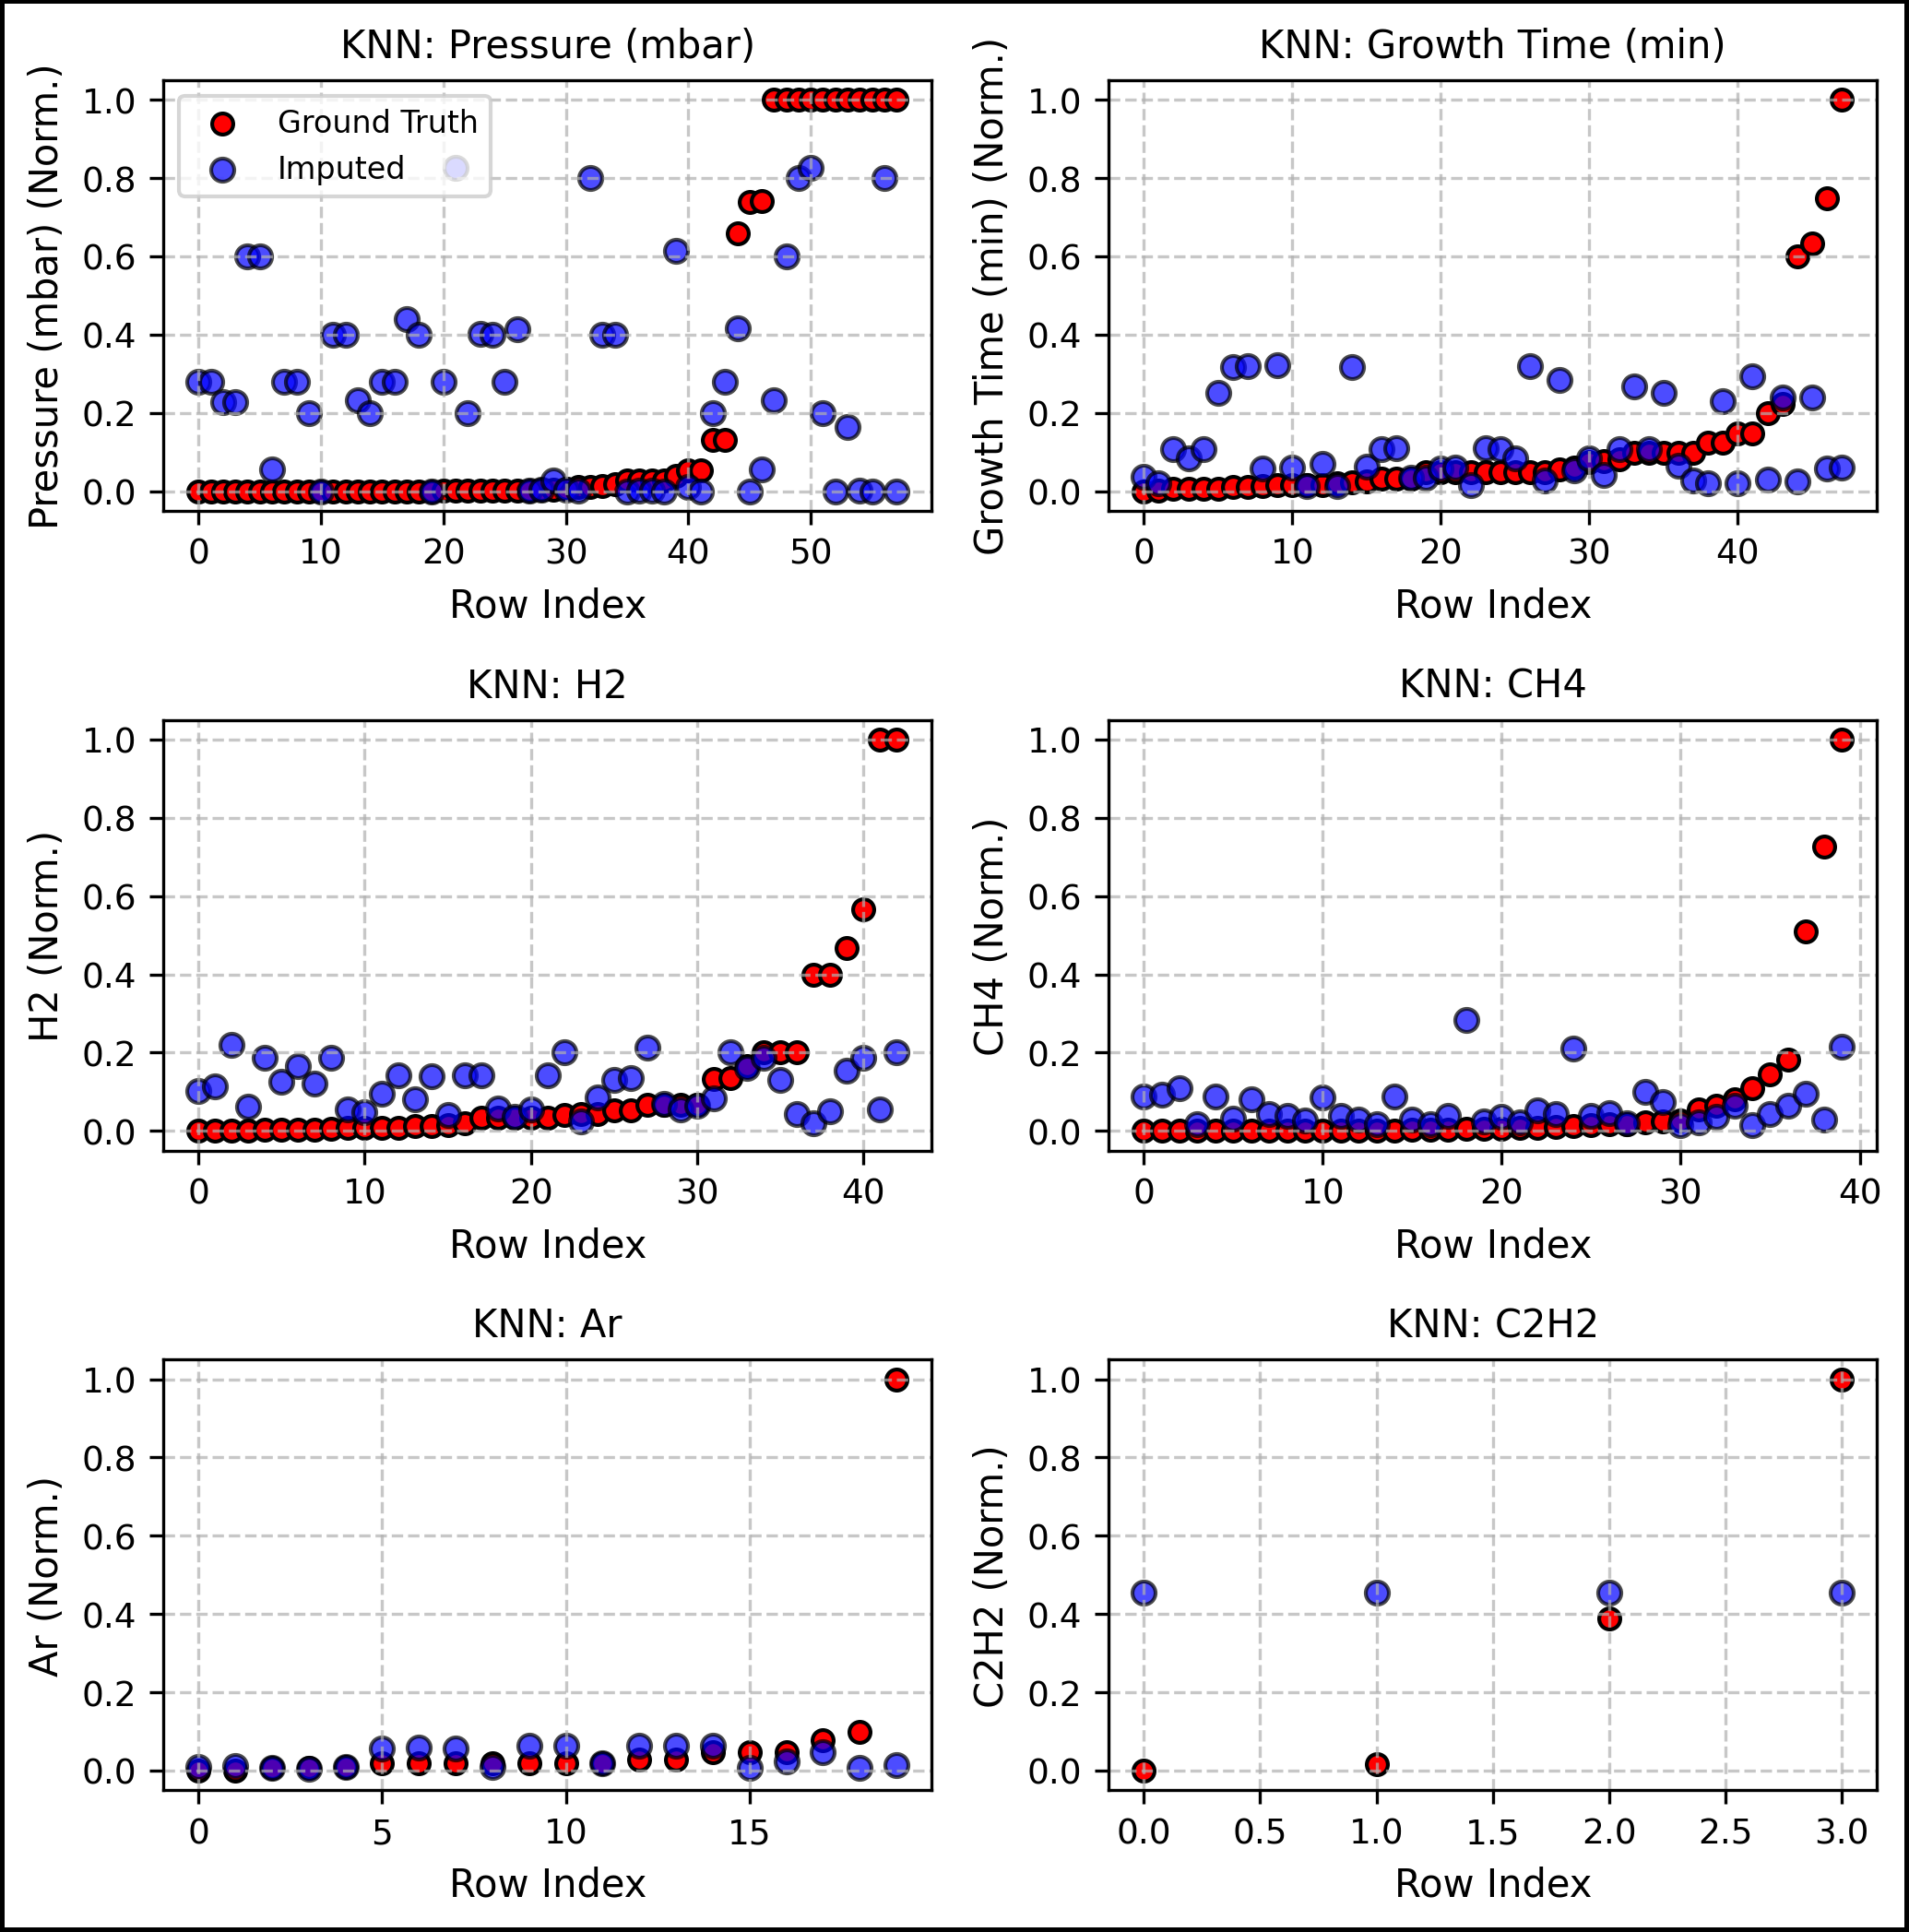

Average Metrics across columns for different K values:
K = 4: MAE = 0.2004, MSE = 0.0874
K = 5: MAE = 0.1969, MSE = 0.0917
K = 6: MAE = 0.1947, MSE = 0.0966


In [2]:
from utils import clear_half_values
from utils import impute_data
from utils import evaluate_imputation
from utils import plot_all_knn_imputations
from utils import compare_knn_for_k_values
from utils import average_metrics_over_columns

setup_plot_style()

columns_to_impute = ['Pressure (mbar)', 'Growth Time (min)', 'H2', 'CH4', 'Ar', 'C2H2']
errors = {}

data_preprocessed = preprocess_data(load_graphene_data())
for target_column in columns_to_impute:
    data_with_cleared, original_values = clear_half_values(data_preprocessed, target_column)
    imputed_data_df = impute_data(data_with_cleared, columns_to_impute, knn_neighbors=5)
    error_metrics = evaluate_imputation(imputed_data_df, original_values, target_column)
    if error_metrics:
        errors[target_column] = error_metrics

# Plot all KNN imputations for visualization
plot_all_knn_imputations(data_preprocessed, columns_to_impute)

# Compare different K values
k_values = [4, 5, 6]
metrics_by_k = compare_knn_for_k_values(data_preprocessed, columns_to_impute, k_values=k_values)
avg_metrics = average_metrics_over_columns(metrics_by_k, k_values=k_values)

print("Average Metrics across columns for different K values:")
for k in k_values:
    print(f"K = {k}: MAE = {avg_metrics[k]['MAE']:.4f}, MSE = {avg_metrics[k]['MSE']:.4f}")

**gpt and knn comparison**

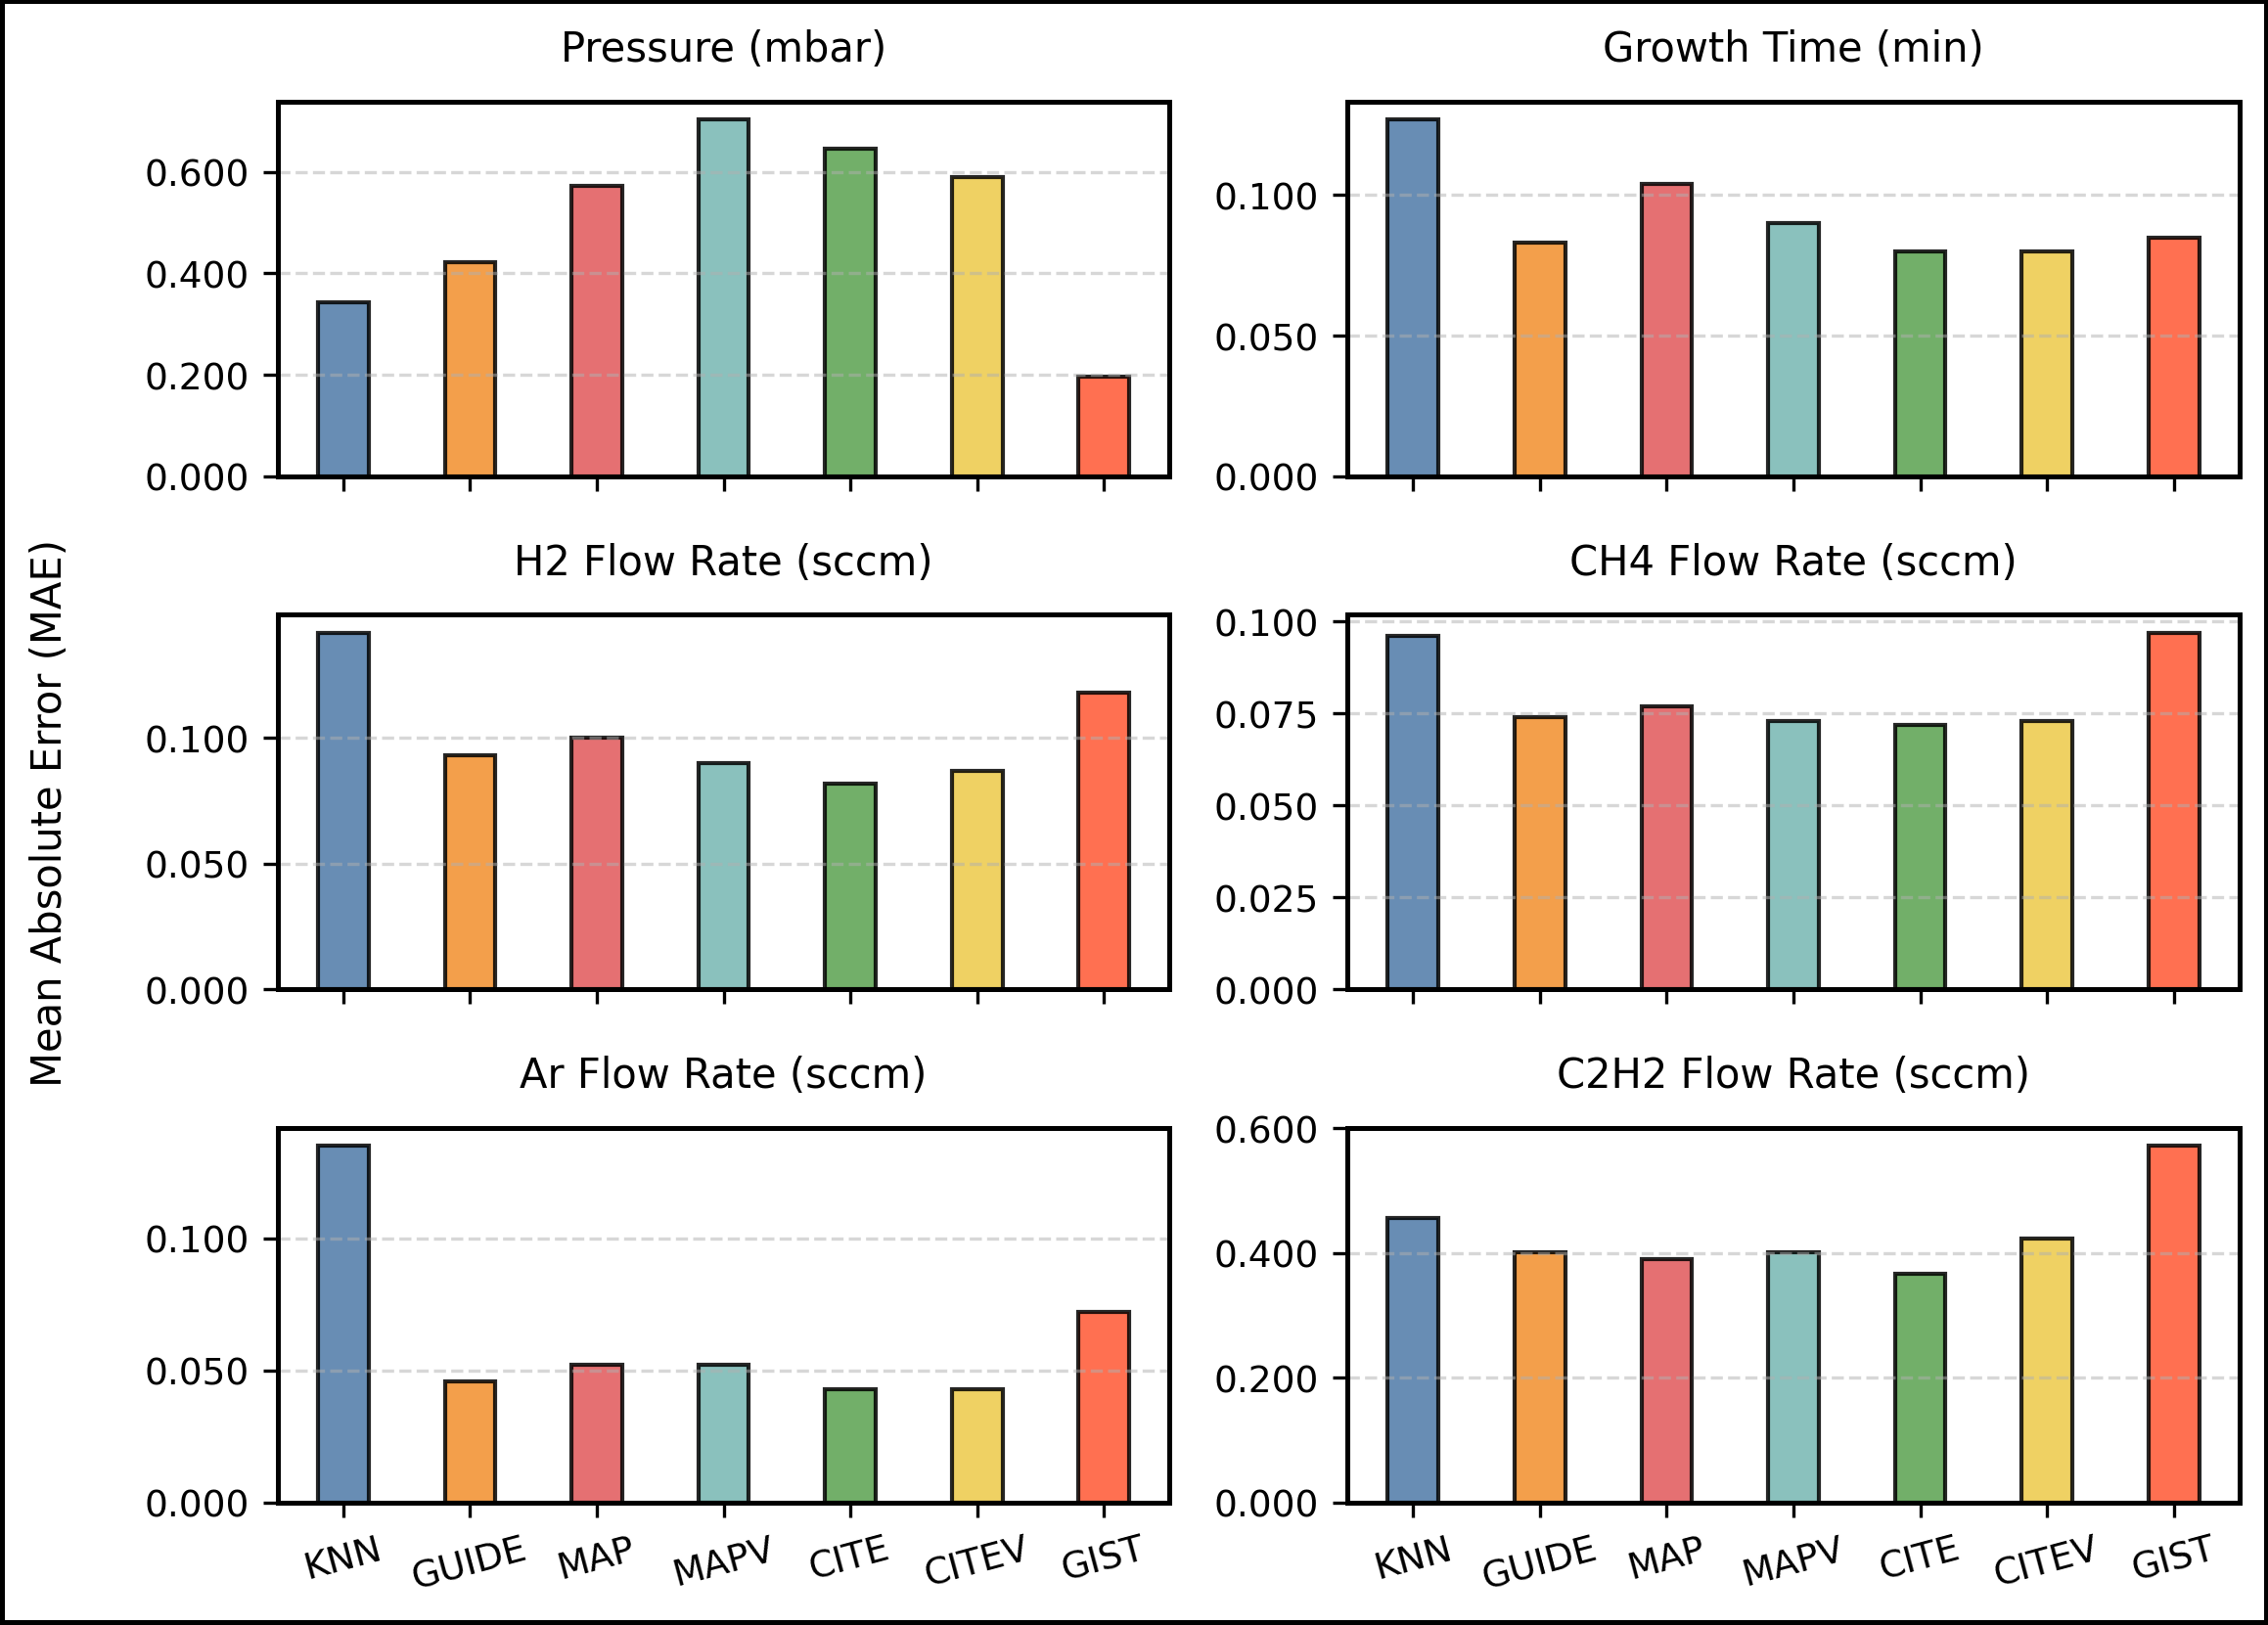

In [ ]:
from utils import compare_knn_gpt4o_mae
from utils import compare_knn_gpt4o_mse
setup_plot_style()
'''The following values are obtained in the analysis step of imputation.ipynb files, hardcoded here for simplicity. 
Will be automated in future. Copy the values from the analysis step of imputation.ipynb file here as per your requirement.'''

# Dictionary of MAE values for various methods
gpt_mae_min = {
    'Pressure (mbar)': 0.1770, 'Growth Time (min)': 0.0667, 'H2': 0.0639, 'CH4': 0.0643, 'Ar': 0.0414, 'C2H2': 0.1038
}

gpt_mae_avg = {
    'Pressure (mbar)': 0.4223, 'Growth Time (min)': 0.0832,
    'H2': 0.0928, 'CH4': 0.0738, 'Ar': 0.0464, 'C2H2': 0.4019
}

gpt_mse_min = {
    'Pressure (mbar)': 0.0559, 'Growth Time (min)': 0.0296, 'H2': 0.0186, 'CH4': 0.0364, 'Ar': 0.0258, 'C2H2': 0.0262
}

gpt_mse_avg = {
    'Pressure (mbar)': 0.2256, 'Growth Time (min)': 0.0329, 'H2': 0.0378, 'CH4': 0.0384, 'Ar': 0.0262, 'C2H2': 0.2624
}

gpt_DPrompt_mae_avg = {
    'Pressure (mbar)': 0.5719, 'Growth Time (min)': 0.1044,
    'H2': 0.1001, 'CH4': 0.0766, 'Ar': 0.0517, 'C2H2': 0.3907
}

gpt_DPrompt_mse_avg = {
    'Pressure (mbar)': 0.4364, 'Growth Time (min)': 0.0322,
    'H2': 0.0440, 'CH4': 0.0401, 'Ar': 0.0264, 'C2H2': 0.1915
}

gpt_Prompt3_mae_avg = {
    'Pressure (mbar)': 0.7044, 'Growth Time (min)': 0.0905,
    'H2': 0.0898, 'CH4': 0.0733, 'Ar': 0.0525, 'C2H2': 0.4012
}

gpt_Prompt3_mse_avg = {
    'Pressure (mbar)': 0.6177, 'Growth Time (min)': 0.0311,
    'H2': 0.0375, 'CH4': 0.0387, 'Ar': 0.0268, 'C2H2': 0.1969
}

gpt_Prompt4_mae_avg = {
    'Pressure (mbar)': 0.6450, 'Growth Time (min)': 0.0799,
    'H2': 0.0816, 'CH4': 0.0720, 'Ar': 0.0435, 'C2H2': 0.3669
}

gpt_Prompt4_mse_avg = {
    'Pressure (mbar)': 0.5255, 'Growth Time (min)': 0.0349,
    'H2': 0.0257, 'CH4': 0.0382, 'Ar': 0.0254, 'C2H2': 0.1929
}

gpt_Prompt5_mae_avg = {
    'Pressure (mbar)': 0.5897, 'Growth Time (min)': 0.0798,
    'H2': 0.0868, 'CH4': 0.0726, 'Ar': 0.0432, 'C2H2': 0.4229
}

gpt_Prompt5_mse_avg = {
    'Pressure (mbar)': 0.4354, 'Growth Time (min)': 0.0349,
    'H2': 0.0338, 'CH4': 0.0385, 'Ar': 0.0254, 'C2H2': 0.2021
}

gpt_PromptGIST_mae_avg = {
    'Pressure (mbar)': 0.1968, 'Growth Time (min)': 0.0846,
    'H2': 0.1183, 'CH4': 0.0967, 'Ar': 0.0718, 'C2H2': 0.5719
}

gpt_PromptGIST_mse_avg = {
    'Pressure (mbar)': 0.1322, 'Growth Time (min)': 0.0431,
    'H2': 0.0539, 'CH4': 0.0475, 'Ar': 0.0450, 'C2H2': 0.7474
}
methods_mae = {
    'GUIDE': gpt_mae_avg,
    'MAP': gpt_DPrompt_mae_avg,
    'MAPV': gpt_Prompt3_mae_avg,
    'CITE': gpt_Prompt4_mae_avg,
    'CITEV': gpt_Prompt5_mae_avg,
    'GIST': gpt_PromptGIST_mae_avg
    # You can add more methods here in the future
}

# Dictionary of MSE values for various methods
methods_mse = {
    'GUIDE': gpt_mse_avg,
    'MAP': gpt_DPrompt_mse_avg,
    'MAPV': gpt_Prompt3_mse_avg,
    'CITE': gpt_Prompt4_mse_avg,
    'CITEV': gpt_Prompt5_mse_avg,
    'GIST': gpt_PromptGIST_mse_avg
    # You can add more methods here in the future
}
compare_knn_gpt4o_mae(errors, methods_mae, save_path="Data/mae_plot.pdf")
#compare_knn_gpt4o_mse(errors, methods_mse, save_path="Data/mse_plot.pdf")

**Distribution Plots**

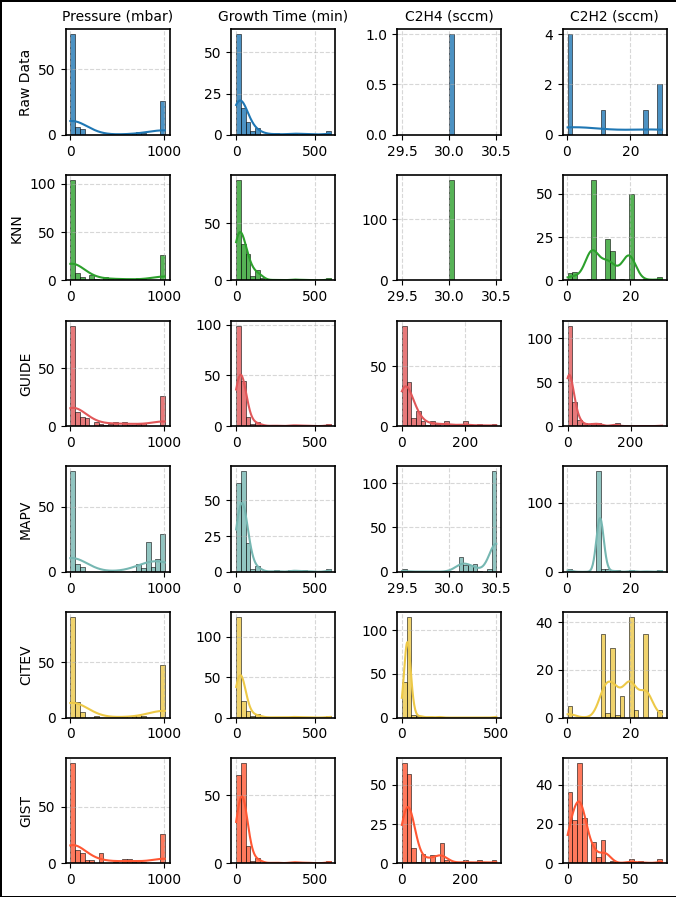

/Users/devcmrl/Desktop/Fall 2024/GScarceLLM/utils.py:766: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/Users/devcmrl/Desktop/Fall 2024/GScarceLLM/utils.py:789: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


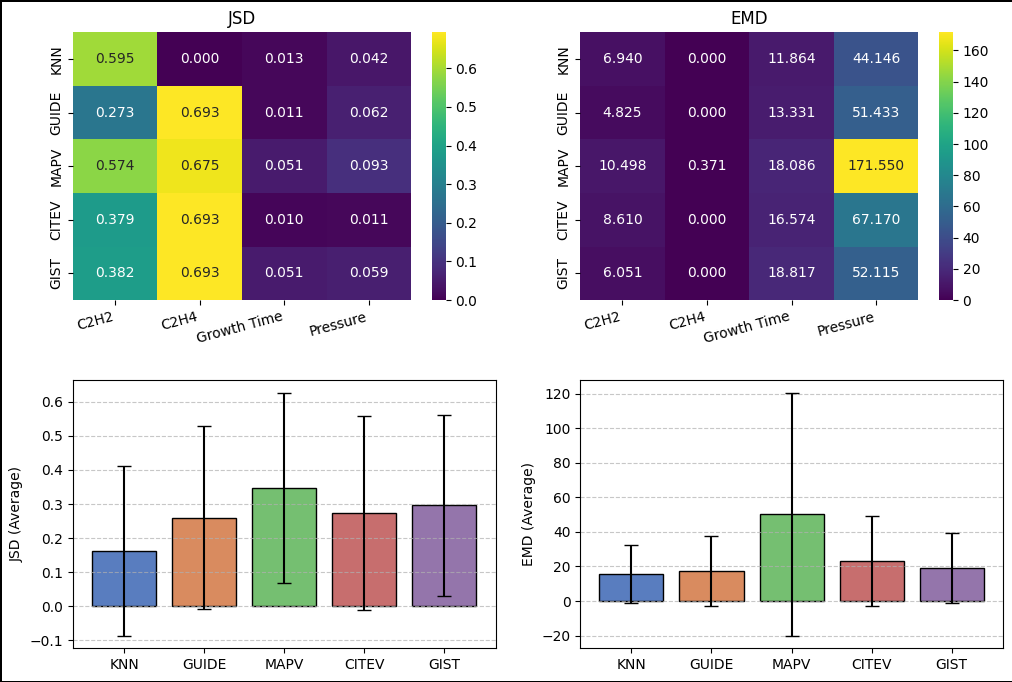

In [7]:
from utils import plot_methods_by_rows, plot_jsd_emd_side_by_side
import pandas as pd # type: ignore

data_preprocessed = preprocess_data(load_graphene_data())

# Load KNN data from your CSV
data_imputed_KNN = pd.read_csv("Data/KNN_final_imputed_data.csv")

# Load ChatGPT-imputed datasets.
guide_data  = pd.read_csv("Data/guide_imputed_data.csv")                
mapv_data   = pd.read_csv("Data/mapv_imputed_data.csv")        
citev_data  = pd.read_csv("Data/citev_imputed_data.csv")  
gist_data   = pd.read_csv("Data/gist_imputed_data.csv")

chatgpt_labels = ["GUIDE", "MAPV", "CITEV", "GIST"]
chatgpt_datasets = [guide_data, mapv_data, citev_data, gist_data]

# Attributes to compare.
columns_to_compare = [
    'Pressure (mbar)',
    'Growth Time (min)',
    'C2H4',
    'C2H2'
]

# Plot multi-row figure and compute JSD/EMD.
jsd_results, emd_results = plot_methods_by_rows(
    data_preprocessed=data_preprocessed,
    data_imputed_knn=data_imputed_KNN,
    chatgpt_imputed_datasets=chatgpt_datasets,
    chatgpt_labels=chatgpt_labels,
    columns=columns_to_compare,
    bins=20,
    save_path="Data/methods_vs_attributes.pdf" 
)

# Plot 2×2 JSD & EMD comparison figure.
plot_jsd_emd_side_by_side(jsd_results, emd_results, save_path="Data/jsd_emd_comparison.pdf")

**ML Plots**

In [ ]:
from ml import (
    plot_tsne_for_four_datasets,
    plot_auroc_and_distributions,
    plot_model_learning_curves,
    plot_aggregate_learning_curves
)

# --- Example 1: t-SNE Subplots for Four Datasets ---
files_and_targets = [
    ("knn_label_binary_cont.csv", "No. of Graphene Layers"),
    ("Binary_GIST_SE_8_DT.csv", "No. of Graphene Layers"),
    ("knn_label_ternary_cont.csv", "No. of Graphene Layers"),
    ("Ternary_GUIDE_SE_4_DT.csv", "No. of Graphene Layers")
]
subplot_titles = ["Binary KNN LE", "Binary GIST SE(8) DT", "Ternary KNN LE", "Ternary GUIDE SE(4) DT"]

plot_tsne_for_four_datasets(
    files_and_targets=files_and_targets,
    subplot_titles=subplot_titles,
    sampling_method=None,
    figsize=(14, 10),
    pdf_filename="tsne_fourplot_updated.pdf"
)

# --- Example 2: AUROC and Probability Distribution Plots- Create the following datasets with other clubs ---
four_datasets = [
    "GUIDE_SE4.csv",
    "KNN_SE4.csv",
    "MAPV_SE4.csv",
    "CITEV_SE4.csv"
]
subplot_titles = ["GUIDE_SE4", "KNN_SE4", "MAPV_SE4", "CITEV_SE4"]
custom_label_map = {0: "Monolayer", 1: "Multilayer"}

plot_auroc_and_distributions(
    datasets=four_datasets,
    titles=subplot_titles,
    target_col="No. of Graphene Layers",
    class_label_map=custom_label_map,
    figsize=(10, 8),
    save_path_auroc="my_auroc_plots.pdf",
    save_path_dist="my_distribution_plots.pdf"
)